1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
4.   Machine Learning and also Deep Learning

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# import string
# from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings

warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding= 'ISO-8859-1', encoding_errors = 'strict')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df=df.drop(df.columns[[2,3,4]],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: >

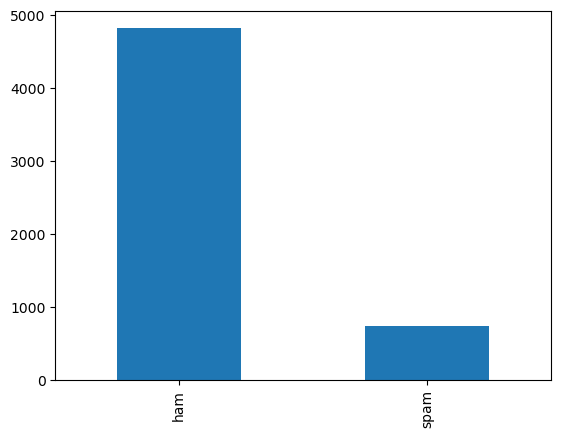

In [8]:
df['v1'].value_counts().plot(kind='bar')

In [9]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [10]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
#     stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [13]:
df['v2'] = df['v2'].map(lambda s:preprocess(s))

# VECTORIZE THE TEXT

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [15]:
x=vect.fit_transform(df['v2'])

In [16]:
type(x)

scipy.sparse.csr.csr_matrix

# ENCODING

In [17]:
le=LabelEncoder()

In [18]:
y=le.fit_transform(df['v1'])

In [19]:
y

array([0, 0, 1, ..., 0, 0, 0])

# SHOWING WORDCLOUD OF HAM AND SPAM DATA 


In [20]:
df['after_transformation'] = df['v2']


In [21]:
from wordcloud import WordCloud

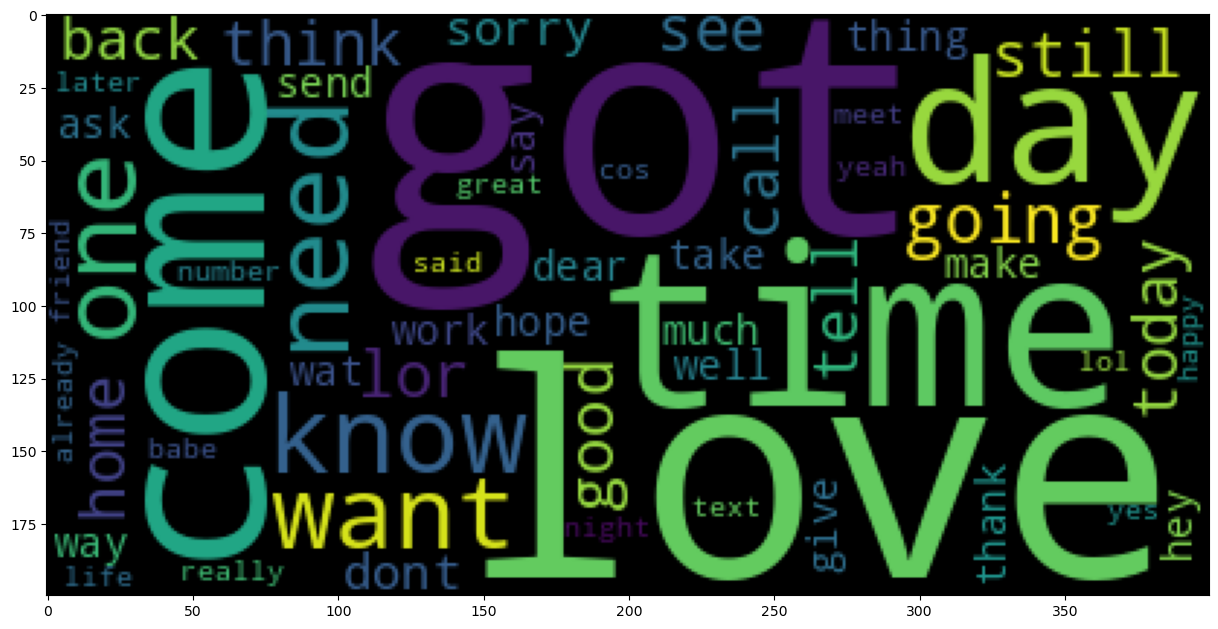

In [22]:
wc = WordCloud(min_font_size=8)
spam_wc = wc.generate(df[df['v1']=='ham']['after_transformation'].str.cat(sep=" "))
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

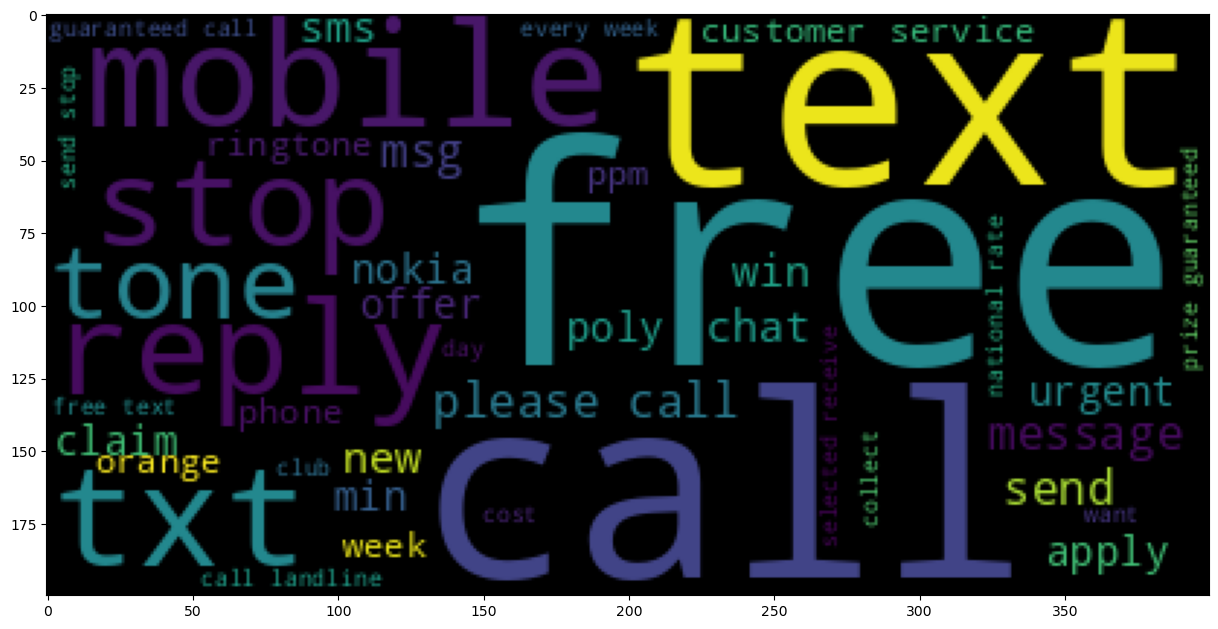

In [23]:
wc = WordCloud(min_font_size=8)
spam_wc = wc.generate(df[df['v1']=='spam']['after_transformation'].str.cat(sep=" "))
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

# REMOVING DUPLICATES

In [24]:
df.duplicated().sum()


561

In [25]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()


0

In [26]:
pd.DataFrame(y).value_counts()

0    4825
1     747
dtype: int64

# SMOTING

In [27]:
from imblearn.combine import SMOTETomek
# x=df.loc[:,:'foreigner']
# y=df.loc[:,'Group_no']
smt=SMOTETomek()
x_new,y_new=smt.fit_resample(x,y)


In [28]:
pd.DataFrame(y_new).value_counts()

0    4825
1    4825
dtype: int64

# TRAIN_TEST_SPLIT 

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=0.2,random_state=142)

In [30]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(7720, 7386)
(1930, 7386)
(7720,)
(1930,)


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [32]:
# [CV] END criterion=entropy, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   7.2s

random_grid={'criterion':['entropy'],
            'max_depth':[110],
            'max_features': ['auto'],
            'min_samples_leaf': [2],
            'min_samples_split': [5],
            'n_estimators': [180]}

In [33]:
rf = RandomForestClassifier(criterion='entropy',max_depth=110,max_features='auto',min_samples_leaf=2,min_samples_split=5,n_estimators=180)
# clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,verbose=2, random_state=123)

In [34]:
# search = clf.fit(xtrain, ytrain)

In [35]:
# search.best_score_

# Application of RandomForestClassifier

In [36]:
# rf=RandomForestClassifier()

In [37]:
rf.fit(xtrain,ytrain)
rf_pred_train=rf.predict(xtrain)
rf_pred_test=rf.predict(xtest)


In [38]:
print('Train accuracy score of the model is: ', round(accuracy_score(ytrain, rf_pred_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(ytest, rf_pred_test),2))

Train accuracy score of the model is:  1.0
Test accuracy score of the model is:  0.99


# MULTINOMIALNB

In [39]:
nbm = MultinomialNB()

In [40]:
nbm.fit(xtrain, ytrain)
nb_preds_train = nbm.predict(xtrain)
nb_preds_test = nbm.predict(xtest)
print('Train accuracy score of the model is: ', round(accuracy_score(ytrain, nb_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(ytest, nb_preds_test),2))

Train accuracy score of the model is:  0.98
Test accuracy score of the model is:  0.98


# TRANSFER LAERNING HUGGING FACE

In [41]:
!pip install transformers

In [42]:
# !pip install --upgrade transformers wandb


In [ ]:
!pip install xformers

In [44]:
from transformers import pipeline

# import wandb


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="skandavivek2/spam-classifier")

In [46]:
preds = pipe(str(df['v2'][2]))

In [50]:
print(preds)

[{'label': 'SPAM', 'score': 0.9995269775390625}]


In [53]:
import gradio as gr


In [55]:

def transform(input_text):
        transformed_input = preprocess(input_text)
        vectorizedd = vect.transform([transformed_input])
        result = rf.predict_proba(vectorizedd)[0]
        return {"ham" : float(result[0]), "spam" : float(result[1])}


demo = gr.Interface(
    fn=transform,
    inputs=gr.Textbox(),
    outputs='label',
)
demo.launch()

Running on local URL:  http://127.0.0.1:7861
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on public URL: https://216f3c4e52d9f0447e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
